# Zircon trace element data analysis

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

If pyrolite is not installed run:

```
!pip install --upgrade pyrolite
```

In [2]:
from pyrolite.plot import pyroplot

## Import all of the data

### Import new data from this study

In [3]:
BM_IR_data = pd.read_excel('../data/U_Pb/Northbrae_Burdell_LA_ICP_MS_data.xlsx',
                           sheet_name='Table 1 Sample data',skiprows=6,nrows=74)

#There is one inherited grain in IR22-1 that needs to be dropped
BM_IR_data = BM_IR_data[BM_IR_data['Analysis']!='IR22-1 S 18']

In [4]:
BM_IR_data.tail()

,Sample,Analysis,U_ppm,Th_ppm,Pb_ppm,Th/U,206Pb_cps,206Pb_204Pb,206Pb_204Pb_1s,208Pb_232Th,208Pb_232Th_2s,207Pb_235U,207Pb_235U_2s,206Pb_238U,206Pb_238U_2s,error_corr.,238U_206Pb,238U_206Pb_2s,207Pb_206Pb,207Pb_206Pb_2s,208Pb_232Th_date,208Pb_232Th_2s_(Ma),208Pb_232Th_2s-sys_(Ma),207Pb_206Pb_date,207Pb_206Pb_2s_(Ma),207Pb_206Pb_2s-sys_(Ma),207Pb_235U_date,207Pb_235U_2s_(Ma),207Pb_235U_2s-sys_(Ma),206Pb_238U_date,206Pb_238U_2s_(Ma),206Pb_238U_2s-sys_(Ma),7/6 disc._(%),2s_(%),P,Ti,Y,Nb,La,Ce,Pr,Nd,Sm,Eu,Gd,Tb,Dy,Ho,Er,Tm,Yb,Lu,Hf,Ta,Th,U,Ti-in-zircon_T(C),Ce/Ce*,Eu/Eu*,Epsilon_REE,(Gd/Yb)cn,Lu/Hf,Nb/Ta,Nb/U,Nb/Th,Th/U.1,Th/Y,Hf/Y,Nb/Yb,U/Yb,Experiment,location
69,IR22-1,IR22-1 S 28,5377.464092,3855.078967,11.604423,0.716895,9153.979773,9153.979773,206.447100,0.000609,5.397038,0.013692,10.980238,0.001622,4.541211,0.413580,616.616740,4.541211,0.061232,9.997151,12.314697,0.664426,0.963285,647.387682,214.742436,215.170379,13.808150,1.505905,1.540736,10.446023,0.473992,0.530836,24.348860,8.936068,385.279792,15.661421,8265.127358,284.581942,0.534871,215.018200,1.428755,21.022077,42.951837,0.983116,214.509415,77.760964,841.666073,289.407397,1201.358991,236.457154,2175.092701,306.387679,10764.131612,83.755684,3855.078967,5377.464092,844.755524,60.305407,0.031312,5624.579229,0.081584,0.028464,3.397763,0.052921,0.073820,0.716895,0.466427,1.302355,0.130837,2.472292,Zircon_01Sep22_Hodgin,core
70,IR22-1,IR22-1 S 29,926.453040,503.120124,1.938612,0.543061,1638.998431,400.637430,23.437025,0.000557,18.830347,0.010063,25.624823,0.001717,7.287965,0.284410,582.427976,7.287965,0.042508,24.566586,11.258383,2.119402,2.213394,-196.308125,615.084404,615.287687,10.166859,2.592240,2.603351,11.058683,0.805262,0.844065,-8.771877,28.842366,325.787038,5.406216,6346.439930,5.062628,0.068976,21.081549,1.027824,19.574939,37.109752,9.886668,197.581175,60.910809,694.200174,235.596988,977.001028,195.398265,1716.387081,285.462954,5534.155892,1.115225,503.120124,926.453040,736.196750,19.412344,0.352985,4451.288183,0.095229,0.051582,4.539559,0.005465,0.010062,0.543061,0.079276,0.872009,0.002950,0.539769,Zircon_01Sep22_Hodgin,core
71,IR22-1,IR22-1 S 31,2117.285859,1058.076179,4.594404,0.499732,3724.278602,282.528270,5.250146,0.000592,19.762005,0.012350,13.472919,0.001784,5.024898,0.372963,560.436645,5.024898,0.050199,12.500798,11.970699,2.364950,2.462514,204.224499,290.075483,290.448712,12.463264,1.668902,1.694612,11.492235,0.576959,0.633938,7.791131,13.186578,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Zircon_01Sep22_Hodgin,core
72,IR22-1,IR22-1 S 32,3596.726711,2810.075399,8.161907,0.781287,6223.418097,268.459296,12.261220,0.000550,10.704943,0.011300,11.320828,0.001758,6.204612,0.548071,568.951951,6.204612,0.046631,9.469104,11.112988,1.189312,1.349553,30.350688,226.938251,227.447303,11.409969,1.284473,1.312410,11.320386,0.701770,0.747946,0.785130,12.750560,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Zircon_01Sep22_Hodgin,core
73,IR22-1,IR22-1 S 33,1145.675562,603.479933,2.382630,0.526746,2046.340216,7114.100161,287.563246,0.000512,17.349207,0.011521,16.406446,0.001726,6.341673,0.386535,579.309867,6.341673,0.048406,15.131247,10.354717,1.796001,1.891994,119.138530,356.661263,356.975040,11.631347,1.897402,1.917161,11.118155,0.704469,0.748895,4.412147,16.728041,567.641031,7.480062,5307.806822,10.384760,2.073519,32.747793,1.373018,15.399593,26.366001,1.678183,149.383592,47.583476,559.317075,191.213742,814.638414,155.966570,1411.270937,208.319859,6673.579831,2.863481,603.479933,1145.675562,767.031218,4.758548,0.081750,3617.331774,0.087565,0.031216,3.626621,0.009064,0.017208,0.526746,0.113697,1.257314,0.007358,0.811804,Zircon_01Sep22_Hodgin,core


In [5]:
BM_IR_data.columns

Index(['Sample', 'Analysis', 'U_ppm', 'Th_ppm', 'Pb_ppm', 'Th/U', '206Pb_cps',
       '206Pb_204Pb', '206Pb_204Pb_1s', '208Pb_232Th', '208Pb_232Th_2s',
       '207Pb_235U', '207Pb_235U_2s', '206Pb_238U', '206Pb_238U_2s',
       'error_corr.', '238U_206Pb', '238U_206Pb_2s', '207Pb_206Pb',
       '207Pb_206Pb_2s', '208Pb_232Th_date', '208Pb_232Th_2s_(Ma)',
       '208Pb_232Th_2s-sys_(Ma)', '207Pb_206Pb_date', '207Pb_206Pb_2s_(Ma)',
       '207Pb_206Pb_2s-sys_(Ma)', '207Pb_235U_date', '207Pb_235U_2s_(Ma)',
       '207Pb_235U_2s-sys_(Ma)', '206Pb_238U_date', '206Pb_238U_2s_(Ma)',
       '206Pb_238U_2s-sys_(Ma)', '7/6 disc._(%)', '2s_(%)', 'P', 'Ti', 'Y',
       'Nb', 'La', 'Ce', 'Pr', 'Nd', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er',
       'Tm', 'Yb', 'Lu', 'Hf', 'Ta', 'Th', 'U', 'Ti-in-zircon_T(C)', 'Ce/Ce*',
       'Eu/Eu*', 'Epsilon_REE', '(Gd/Yb)cn', 'Lu/Hf', 'Nb/Ta', 'Nb/U', 'Nb/Th',
       'Th/U.1', 'Th/Y', 'Hf/Y', 'Nb/Yb', 'U/Yb', 'Experiment', 'location'],
      dtype='object')

### Import data from Berkeley Hills Volcanics from Gerasimov et al. 2023

In [6]:
MT_OR_data = pd.read_excel('../data/U_Pb/TableS1_LA-ICP-MS_Gerasimov_21Nov2022.xlsx',
                           sheet_name='Table S1 - samples',skiprows=7)

In [7]:
MT_OR_data.head()

,Sample,Analysis,Notes,U_ppm,Th_ppm,Pb_ppm,Th/U,206Pb_cps,206Pb_204Pb,206Pb_204Pb_1s,208Pb_232Th,208Pb_232Th_2s,207Pb_235U,207Pb_235U_2s,206Pb_238U,206Pb_238U_2s,error_corr.,238U_206Pb,238U_206Pb_2s,207Pb_206Pb,207Pb_206Pb_2s,208Pb_232Th_date,208Pb_232Th_2s_(Ma),208Pb_232Th_2s-sys_(Ma),207Pb_206Pb_date,207Pb_206Pb_2s_(Ma),207Pb_206Pb_2s-sys_(Ma),207Pb_235U_date,207Pb_235U_2s_(Ma),207Pb_235U_2s-sys_(Ma),206Pb_238U_date,206Pb_238U_2s_(Ma),206Pb_238U_2s-sys_(Ma),7/6 disc._(%),disc._(%),2s_(%),P,Ti,Y,Zr,Nb,La,Ce,Pr,Nd,Sm,Eu,Gd,Tb,Dy,Ho,Er,Tm,Yb,Lu,Hf,Ta,Th,U,Experiment,Ti-in-zircon_T(C),Ce/Ce*,Eu/Eu*,Epsilon_REE,(Gd/Yb)cn,Lu/Hf,Nb/Ta,Nb/U,Nb/Th,Th/U.1,Th/Y,Hf/Y,U/Yb,Nb/Yb
0,MT24-1,MT24-1_M_54,sweeps 23-41,675.332155,226.976255,1.060445,0.336096,2021.242994,143.857846,3.789530,0.000621,9.927752,0.011639,9.615284,0.001277,3.550395,0.369245,782.991038,3.550395,0.066094,8.935792,12.546340,1.245183,1.270334,809.367029,186.949022,187.045797,11.749535,1.123240,1.143746,8.227810,0.291933,0.328174,98.983427,29.973318,0.237564,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,MT24-1,MT24-1_M_72,sweeps 23-41,894.030058,361.131316,1.372173,0.403936,2658.186274,159.346733,5.677786,0.000462,7.933897,0.008627,9.472979,0.001285,3.096017,0.326826,777.936005,3.096017,0.048672,8.952766,9.344879,0.741242,0.764440,132.053563,210.522165,210.630788,8.721721,0.822669,0.838151,8.281240,0.256224,0.297382,93.728878,5.050394,9.999418,623.581910,2.702494,1732.977604,509583.884052,5.399892,10.006023,51.943801,3.990092,20.051590,8.398804,0.144564,33.236677,11.907219,164.324775,64.964705,304.119953,69.062722,650.420901,108.158314,13089.600931,3.157505,361.131316,894.030058,Zircon_26Mar21_Gerasimov_1_align20_EBHedit.csv,676.106813,2.015562,0.026452,1500.730142,0.042273,0.008263,1.710177,0.006040,0.014953,0.403936,0.208388,7.553243,1.374541,0.008302
2,MT24-1,MT24-1_M_27,sweeps 23-41,993.048686,438.174832,1.544611,0.441242,2812.430395,168.592892,3.414563,0.000447,12.501809,0.007865,8.292627,0.001301,4.459497,0.537767,768.501458,4.459497,0.043840,6.991463,9.028643,1.128492,1.142938,-119.700194,172.446079,172.592353,7.955189,0.657117,0.673068,8.382839,0.373590,0.403364,107.003195,-5.375731,10.093979,398.228412,3.947949,2353.235215,494873.094358,6.373303,NaN,26.223773,0.106265,2.164213,5.777673,0.162048,42.115316,16.882692,231.278334,93.922198,423.193610,92.858028,840.077588,145.219052,11438.207925,3.412361,438.174832,993.048686,Zircon_26Mar21_Gerasimov_1_align20_EBHedit.csv,708.037415,242.018761,0.031759,1919.980791,0.041472,0.012696,1.867711,0.006418,0.014545,0.441242,0.186201,4.860631,1.182092,0.007587
3,MT24-1,MT24-1_M_36,sweeps 23-41,926.868074,373.830787,1.441320,0.403327,2626.487368,126.965448,4.261118,0.000465,11.680989,0.008743,12.022287,0.001304,5.949497,0.494872,766.889136,5.949497,0.048628,10.446955,9.402371,1.098034,1.114128,129.884846,245.756935,245.850153,8.838711,1.058004,1.070349,8.400451,0.499459,0.522288,93.532385,4.958416,12.243504,729.978314,3.420135,2042.027376,510376.738824,6.478202,11.402660,49.293299,4.258554,22.642706,8.390392,0.230435,36.862654,13.884352,182.509289,73.984252,348.616295,79.196640,751.285131,129.042023,12224.890500,3.126096,373.830787,926.868074,Zircon_26Mar21_Gerasimov_1_align20_EBHedit.csv,695.697349,1.734356,0.040058,1711.598681,0.040590,0.010556,2.072298,0.006989,0.017329,0.403327,0.183068,5.986644,1.233710,0.008623
4,MT24-1,MT24-1_M_62,sweeps 23-41,934.342208,368.672270,1.408437,0.394579,2724.409424,141.063086,5.660239,0.000336,15.081112,0.009476,11.876908,0.001306,4.181611,0.352079,765.677993,4.181611,0.052620,11.116432,6.793994,1.024438,1.033434,312.466654,252.960683,253.045306,9.576113,1.132000,1.145599,8.413730,0.351600,0.383592,97.307319,12.138357,2.182791,332.255516,2.624418,1769.566990,480432.136375,5.550828,NaN,25.699216,0.069895,1.366961,4.374638,0.050903,30.985315,12.562323,167.903959,67.225312,318.356712,72.9

In [8]:
all_data = pd.concat([BM_IR_data,MT_OR_data])

In [9]:
all_data

,Sample,Analysis,U_ppm,Th_ppm,Pb_ppm,Th/U,206Pb_cps,206Pb_204Pb,206Pb_204Pb_1s,208Pb_232Th,208Pb_232Th_2s,207Pb_235U,207Pb_235U_2s,206Pb_238U,206Pb_238U_2s,error_corr.,238U_206Pb,238U_206Pb_2s,207Pb_206Pb,207Pb_206Pb_2s,208Pb_232Th_date,208Pb_232Th_2s_(Ma),208Pb_232Th_2s-sys_(Ma),207Pb_206Pb_date,207Pb_206Pb_2s_(Ma),207Pb_206Pb_2s-sys_(Ma),207Pb_235U_date,207Pb_235U_2s_(Ma),207Pb_235U_2s-sys_(Ma),206Pb_238U_date,206Pb_238U_2s_(Ma),206Pb_238U_2s-sys_(Ma),7/6 disc._(%),2s_(%),P,Ti,Y,Nb,La,Ce,Pr,Nd,Sm,Eu,Gd,Tb,Dy,Ho,Er,Tm,Yb,Lu,Hf,Ta,Th,U,Ti-in-zircon_T(C),Ce/Ce*,Eu/Eu*,Epsilon_REE,(Gd/Yb)cn,Lu/Hf,Nb/Ta,Nb/U,Nb/Th,Th/U.1,Th/Y,Hf/Y,Nb/Yb,U/Yb,Experiment,location,Notes,disc._(%),Zr
0,BM22-1,BM22-1 L 43,969.806175,695.151658,2.077639,0.716794,1916.700699,157.268230,5.833243,0.000542,16.613066,0.007682,29.239845,0.001733,6.197952,0.211337,577.015649,6.197952,0.032150,28.575408,10.956814,1.819769,1.849714,-951.240967,838.030480,838.148114,7.770618,2.263445,2.265883,11.162322,0.691237,0.705606,-43.647813,42.777220,587.196534,8.010092,8782.085829,8.179087,0.099263,23.834022,1.120590,21.488085,47.955470,2.648856,248.544790,82.808974,894.303485,320.754140,1303.592615,246.652434,2042.714032,344.172669,4707.968935,2.270528,695.151658,969.806175,773.774743,17.521244,0.074176,5580.689427,0.100655,0.073104,3.602284,0.008434,0.011766,0.716794,0.079156,0.536088,0.004004,0.474764,Zircon_07Sep22_Hodgin_1,overgrowth,NaN,NaN,NaN
1,BM22-1,BM22-1 L 44,1160.946797,1077.167990,2.548710,0.927836,2157.939544,2157.939544,77.623232,0.000515,12.429089,0.010595,22.640098,0.001675,4.292392,0.188413,596.937886,4.292392,0.045871,22.229471,10.400346,1.292336,1.330104,-9.146062,536.753817,536.878281,10.701554,2.410119,2.414448,10.790102,0.462766,0.482603,-0.827427,23.115634,591.678352,5.387764,10464.993479,12.202947,0.295949,63.950646,1.495157,27.985411,52.901869,4.638531,288.814808,93.841179,1063.151283,370.731452,1520.816397,290.155425,2342.138742,395.509789,4404.090997,3.218647,1077.167990,1160.946797,735.881792,23.570970,0.114725,6516.426640,0.102010,0.089805,3.791328,0.010511,0.011329,0.927836,0.102931,0.420840,0.005210,0.495678,Zircon_07Sep22_Hodgin_1,core,NaN,NaN,NaN
2,BM22-1,BM22-1 L 45,1604.728830,1043.047102,3.457918,0.649983,3102.089071,2038.430231,91.365102,0.000536,14.545759,0.010927,16.692963,0.001763,5.863233,0.350069,567.275495,5.863233,0.044956,15.629379,10.821545,1.573654,1.607377,-57.987066,380.925673,381.104287,11.034781,1.832059,1.838108,11.353811,0.665115,0.680549,-2.891137,18.114767,610.996708,7.419431,9617.927494,7.965093,0.116488,24.385773,1.184865,20.745030,44.464981,2.319335,255.264745,83.692034,970.218459,358.243202,1414.760201,272.909983,2312.878601,390.039170,4913.463050,2.113718,1043.047102,1604.728830,766.235321,16.093313,0.066555,6151.222869,0.091301,0.079382,3.768285,0.004964,0.007636,0.649983,0.108448,0.510865,0.003444,0.693823,Zircon_07Sep22_Hodgin_1,core,NaN,NaN,NaN
3,BM22-1,BM22-1 L 46,442.110422,160.161886,0.883038,0.362267,858.570595,66.868776,3.397719,0.000542,26.766252,0.014946,26.530435,0.001730,9.900686,0.372746,578.174445,9.900686,0.062674,24.613825,10.942668,2.928149,2.946827,697.205098,524.385639,524.484767,15.063784,3.966988,3.972169,11.139970,1.101981,1.110997,26.047999,20.803605,248.159290,3.794496,1186.905508,2.692170,0.116030,7.043512,0.083205,2.068656,3.177627,0.059109,23.208354,7.812099,102.665434,41.813167,193.785199,41.028073,366.153434,68.248218,5741.348325,1.374493,160.161886,442.110422,704.597314,17.575779,0.021043,857.262118,0.052435,0.011887,1.958664,0.006089,0.016809,0.362267,0.134941,4.837241,0.007353,1.207446,Zircon_07Sep22_Hodgin_1,overgrowth,NaN,NaN,NaN
4,BM22-1,BM22-1 L 48,191.859762,55.483375,0.449401,0.289187,388.431911,74.447181,3.220900,0.001740,30.764389,0.007206,54.885305,0.001825,9.669935,0.175969,547.979580,9.669935,0.028639,54.026744,35.136617,10.800175,10.852407,-1303.915360,1715.838658,1715.905950,7.290632,3.987154,3.988370,11.753247,1.135496,1.145223,-61.210272,89.528974,172.896514,3.70

In [10]:
all_data.columns

Index(['Sample', 'Analysis', 'U_ppm', 'Th_ppm', 'Pb_ppm', 'Th/U', '206Pb_cps',
       '206Pb_204Pb', '206Pb_204Pb_1s', '208Pb_232Th', '208Pb_232Th_2s',
       '207Pb_235U', '207Pb_235U_2s', '206Pb_238U', '206Pb_238U_2s',
       'error_corr.', '238U_206Pb', '238U_206Pb_2s', '207Pb_206Pb',
       '207Pb_206Pb_2s', '208Pb_232Th_date', '208Pb_232Th_2s_(Ma)',
       '208Pb_232Th_2s-sys_(Ma)', '207Pb_206Pb_date', '207Pb_206Pb_2s_(Ma)',
       '207Pb_206Pb_2s-sys_(Ma)', '207Pb_235U_date', '207Pb_235U_2s_(Ma)',
       '207Pb_235U_2s-sys_(Ma)', '206Pb_238U_date', '206Pb_238U_2s_(Ma)',
       '206Pb_238U_2s-sys_(Ma)', '7/6 disc._(%)', '2s_(%)', 'P', 'Ti', 'Y',
       'Nb', 'La', 'Ce', 'Pr', 'Nd', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er',
       'Tm', 'Yb', 'Lu', 'Hf', 'Ta', 'Th', 'U', 'Ti-in-zircon_T(C)', 'Ce/Ce*',
       'Eu/Eu*', 'Epsilon_REE', '(Gd/Yb)cn', 'Lu/Hf', 'Nb/Ta', 'Nb/U', 'Nb/Th',
       'Th/U.1', 'Th/Y', 'Hf/Y', 'Nb/Yb', 'U/Yb', 'Experiment', 'location',
       'Notes', 'disc._(%)'

## Export the data for plotting in isoplotr

In [11]:
isoplotr_data = all_data[['Sample','207Pb_235U', '207Pb_235U_2s', '206Pb_238U', '206Pb_238U_2s',
       'error_corr.']]
isoplotr_data = isoplotr_data[(isoplotr_data['Sample'] == 'BM22-1') | (isoplotr_data['Sample'] == 'IR22-1') ]

In [12]:
isoplotr_data.to_csv('../data/U_Pb/isoplotr_data.csv', index=False)

## Trace element data

In [13]:
te_data  = all_data[['Sample', 'Analysis', 'U_ppm', 'Th_ppm', 'Pb_ppm', 'Th/U','P',
       'Ti', 'Y', 'Zr', 'Nb', 'La', 'Ce', 'Pr', 'Nd', 'Sm', 'Eu', 'Gd', 'Tb',
       'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu', 'Hf', 'Ta', 'Th', 'U',
       'Ti-in-zircon_T(C)', 'Ce/Ce*', 'Eu/Eu*', 'Epsilon_REE', '(Gd/Yb)cn', 'Lu/Hf',
       'Nb/Ta', 'Nb/U', 'Nb/Th', 'Th/U.1', 'Th/Y', 'Hf/Y', 'Nb/Yb', 'U/Yb','location']]
te_data

,Sample,Analysis,U_ppm,Th_ppm,Pb_ppm,Th/U,P,Ti,Y,Zr,Nb,La,Ce,Pr,Nd,Sm,Eu,Gd,Tb,Dy,Ho,Er,Tm,Yb,Lu,Hf,Ta,Th,U,Ti-in-zircon_T(C),Ce/Ce*,Eu/Eu*,Epsilon_REE,(Gd/Yb)cn,Lu/Hf,Nb/Ta,Nb/U,Nb/Th,Th/U.1,Th/Y,Hf/Y,Nb/Yb,U/Yb,location
0,BM22-1,BM22-1 L 43,969.806175,695.151658,2.077639,0.716794,587.196534,8.010092,8782.085829,NaN,8.179087,0.099263,23.834022,1.120590,21.488085,47.955470,2.648856,248.544790,82.808974,894.303485,320.754140,1303.592615,246.652434,2042.714032,344.172669,4707.968935,2.270528,695.151658,969.806175,773.774743,17.521244,0.074176,5580.689427,0.100655,0.073104,3.602284,0.008434,0.011766,0.716794,0.079156,0.536088,0.004004,0.474764,overgrowth
1,BM22-1,BM22-1 L 44,1160.946797,1077.167990,2.548710,0.927836,591.678352,5.387764,10464.993479,NaN,12.202947,0.295949,63.950646,1.495157,27.985411,52.901869,4.638531,288.814808,93.841179,1063.151283,370.731452,1520.816397,290.155425,2342.138742,395.509789,4404.090997,3.218647,1077.167990,1160.946797,735.881792,23.570970,0.114725,6516.426640,0.102010,0.089805,3.791328,0.010511,0.011329,0.927836,0.102931,0.420840,0.005210,0.495678,core
2,BM22-1,BM22-1 L 45,1604.728830,1043.047102,3.457918,0.649983,610.996708,7.419431,9617.927494,NaN,7.965093,0.116488,24.385773,1.184865,20.745030,44.464981,2.319335,255.264745,83.692034,970.218459,358.243202,1414.760201,272.909983,2312.878601,390.039170,4913.463050,2.113718,1043.047102,1604.728830,766.235321,16.093313,0.066555,6151.222869,0.091301,0.079382,3.768285,0.004964,0.007636,0.649983,0.108448,0.510865,0.003444,0.693823,core
3,BM22-1,BM22-1 L 46,442.110422,160.161886,0.883038,0.362267,248.159290,3.794496,1186.905508,NaN,2.692170,0.116030,7.043512,0.083205,2.068656,3.177627,0.059109,23.208354,7.812099,102.665434,41.813167,193.785199,41.028073,366.153434,68.248218,5741.348325,1.374493,160.161886,442.110422,704.597314,17.575779,0.021043,857.262118,0.052435,0.011887,1.958664,0.006089,0.016809,0.362267,0.134941,4.837241,0.007353,1.207446,overgrowth
4,BM22-1,BM22-1 L 48,191.859762,55.483375,0.449401,0.289187,172.896514,3.704804,762.026397,NaN,1.312337,NaN,3.226424,0.004788,0.575184,1.542009,0.247261,10.925175,4.355005,63.024558,25.774977,124.294702,29.321087,271.980665,51.579046,6035.261314,0.852316,55.483375,191.859762,702.533226,660.875760,0.184171,586.850880,0.033230,0.008546,1.539730,0.006840,0.023653,0.289187,0.072810,7.920016,0.004825,0.705417,core
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,OR24-2,OR24-2_L_75 z3,930.572046,832.548407,2.162051,0.894663,629.384146,4.713990,4466.244702,529722.828428,23.954256,61.479604,227.911224,23.892018,131.650703,54.073922,0.578917,176.182869,52.780451,555.051800,185.462882,712.747481,131.322617,1071.518628,165.216419,7922.697728,4.879883,832.548407,930.572046,723.726871,1.458003,0.018133,3549.869535,0.136019,0.020854,4.908777,0.025741,0.028772,0.894663,0.186409,1.773906,0.022355,0.868461,NaN
104,OR24-2,OR24-2_L_86,243.373389,95.833672,0.563209,0.393772,192.070283,2.782529,1667.501512,528041.677732,6.532162,0.033326,18.059255,0.106911,2.673652,5.929951,0.073209,42.815376,14.877147,181.902807,65.030821,261.047416,54.405329,437.318494,72.023257,8544.567748,1.963724,95.833672,243.373389,678.491472,74.179320,0.014046,1156.296950,0.080991,0.008429,3.326416,0.026840,0.068161,0.393772,0.057471,5.124174,0.014937,0.556513,NaN
105,OR24-2,OR24-2_M_48,514.664437,209.985712,1.220162,0.408005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106,OR24-2,OR24-2_S_31,443.643134,217.434940,1.082898,0.490112,260.029239,6.926606,2147.900908,517116.604726,2.749168,0.045425,5.731820,0.191952,4.144916,8.746616,0.116419,54.432502,18.560197,226.229846,81.388253,330.686609,68.524227,587.061435,97.072702,11106.510341,1.363288,217.434940,443.643134,759.562109,15.049896,0.016312,1482.932919,0.07670

In [14]:
from pyrolite.geochem.ind import REE
from pyrolite.geochem.norm import get_reference_composition, all_reference_compositions

chondrite = get_reference_composition("Chondrite_PON")



In [15]:
te_data_norm = te_data.copy()

te_data_norm['La'] = te_data_norm['La']/chondrite['La']
te_data_norm['Ce'] = te_data_norm['Ce']/chondrite['Ce']
te_data_norm['Pr'] = te_data_norm['Pr']/chondrite['Pr']
te_data_norm['Nd'] = te_data_norm['Nd']/chondrite['Nd']
te_data_norm['Sm'] = te_data_norm['Sm']/chondrite['Sm']
te_data_norm['Eu'] = te_data_norm['Eu']/chondrite['Eu']
te_data_norm['Gd'] = te_data_norm['Gd']/chondrite['Gd']
te_data_norm['Tb'] = te_data_norm['Tb']/chondrite['Tb']
te_data_norm['Dy'] = te_data_norm['Dy']/chondrite['Dy']
te_data_norm['Ho'] = te_data_norm['Ho']/chondrite['Ho']
te_data_norm['Er'] = te_data_norm['Er']/chondrite['Er']
te_data_norm['Tm'] = te_data_norm['Tm']/chondrite['Tm']
te_data_norm['Yb'] = te_data_norm['Yb']/chondrite['Yb']
te_data_norm['Lu'] = te_data_norm['Lu']/chondrite['Lu']

In [16]:
color_1, color_2, color_3, color_4 = sns.color_palette('vlag', 4)
color_1

(0.52753571, 0.62574126, 0.77013939)

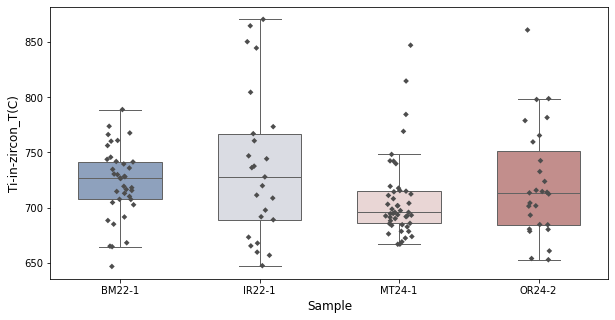

In [17]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Sample',y='Ti-in-zircon_T(C)',data=te_data,
            width=.6, palette="vlag",showfliers = False)
sns.stripplot(x='Sample',y='Ti-in-zircon_T(C)',data=te_data,
              size=4, color=".3", linewidth=0)
plt.show()

<AxesSubplot:xlabel='Sample', ylabel='Eu/Eu*'>

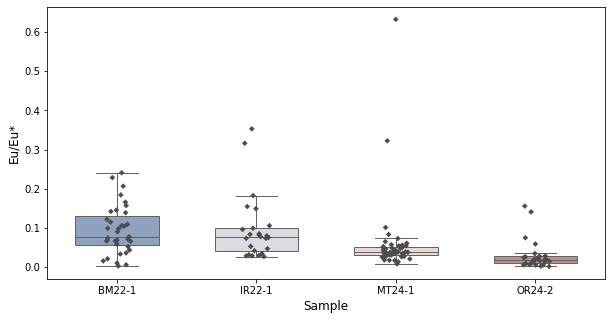

In [18]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Sample',y='Eu/Eu*',data=te_data, width=.6, palette="vlag",showfliers = False)
sns.stripplot(x='Sample',y='Eu/Eu*',data=te_data,
              size=4, color=".3", linewidth=0)

1
0.3161873941677889
1
0.35298543316937964
2
0.32228359865336714
2
0.6326290202805943


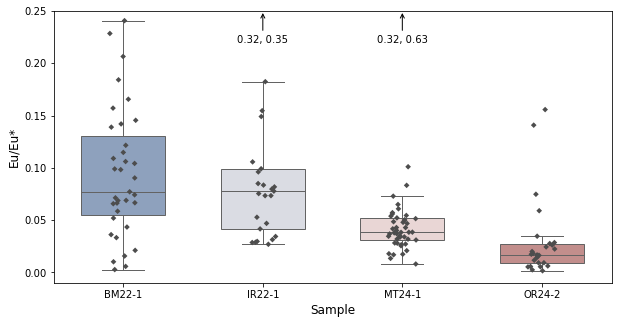

In [19]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Sample', y='Eu/Eu*', data=te_data, width=.6, palette="vlag", showfliers=False)
sns.stripplot(x='Sample', y='Eu/Eu*', data=te_data, size=4, color=".3", linewidth=0)

upper_limit = 0.25
plt.ylim(-0.01, upper_limit)

# Identify the excluded points
excluded_points = te_data[(te_data['Eu/Eu*'] > upper_limit)]

# Get the unique sample names and create a mapping from sample names to numerical indices
sample_names = te_data['Sample'].unique()
sample_name_to_index = {name: index for index, name in enumerate(sample_names)}

# Add arrows and labels for the excluded points
for index, row in excluded_points.iterrows():
    
    sample_index = sample_name_to_index[row['Sample']]
    print(sample_index)
    
    value = row['Eu/Eu*']
    print(value)

sample_index = 1
plt.annotate(
        '0.32, 0.35',
        xy=(sample_index, upper_limit),
        xytext=(sample_index, upper_limit-0.03),
        arrowprops=dict(facecolor='black', arrowstyle='->'),
        horizontalalignment='center')

sample_index = 2
plt.annotate(
        '0.32, 0.63',
        xy=(sample_index, upper_limit),
        xytext=(sample_index, upper_limit-0.03),
        arrowprops=dict(facecolor='black', arrowstyle='->'),
        horizontalalignment='center')
    
plt.show()

In [20]:
excluded_points

,Sample,Analysis,U_ppm,Th_ppm,Pb_ppm,Th/U,P,Ti,Y,Zr,Nb,La,Ce,Pr,Nd,Sm,Eu,Gd,Tb,Dy,Ho,Er,Tm,Yb,Lu,Hf,Ta,Th,U,Ti-in-zircon_T(C),Ce/Ce*,Eu/Eu*,Epsilon_REE,(Gd/Yb)cn,Lu/Hf,Nb/Ta,Nb/U,Nb/Th,Th/U.1,Th/Y,Hf/Y,Nb/Yb,U/Yb,location
52,IR22-1,IR22-1 M 159,746.167636,354.419616,1.526514,0.474987,248.082630,5.488532,5623.529043,NaN,4.335256,0.149890,19.761168,1.107053,19.066624,36.532689,8.279797,175.434855,54.879795,637.934939,220.088435,881.862559,176.054240,1480.282831,273.499967,2555.808309,1.088425,354.419616,746.167636,737.591190,11.893952,0.316187,3984.934841,0.098041,0.107011,3.983055,0.005810,0.012232,0.474987,0.063024,0.454485,0.002929,0.504071,core
70,IR22-1,IR22-1 S 29,926.453040,503.120124,1.938612,0.543061,325.787038,5.406216,6346.439930,NaN,5.062628,0.068976,21.081549,1.027824,19.574939,37.109752,9.886668,197.581175,60.910809,694.200174,235.596988,977.001028,195.398265,1716.387081,285.462954,5534.155892,1.115225,503.120124,926.453040,736.196750,19.412344,0.352985,4451.288183,0.095229,0.051582,4.539559,0.005465,0.010062,0.543061,0.079276,0.872009,0.002950,0.539769,core
46,MT24-1,MT24-1_L_15,448.842232,221.590594,0.784488,0.493694,270.071599,8.915636,1636.959047,478144.675516,0.842268,NaN,7.339656,0.050114,0.946686,2.952445,0.847840,21.908704,9.478428,135.593352,57.992011,287.021501,66.617434,656.961168,117.447747,9398.391493,0.413209,221.590594,448.842232,784.501900,143.634540,0.322284,1365.157085,0.027588,0.012497,2.038359,0.001877,0.003801,0.493694,0.135367,5.741372,0.001282,0.683210,NaN
72,MT24-1,MT24-1_L_18,145.903770,26.356752,2.325259,0.180645,103.523857,2.405428,186.667530,477556.572450,1.201931,NaN,3.665350,0.006543,0.199843,0.715745,0.341005,3.794127,1.189247,15.416165,5.864141,29.298232,6.648096,71.055707,14.487212,10808.307619,0.660176,26.356752,145.903770,666.709997,549.389411,0.632629,152.681414,0.044172,0.001340,1.820623,0.008238,0.045602,0.180645,0.141196,57.901380,0.016915,2.053372,NaN


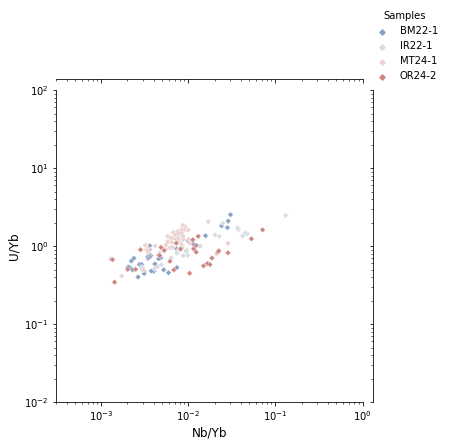

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a custom JointGrid with only ax_joint
g = sns.JointGrid(data=te_data, x="Nb/Yb", y="U/Yb", hue="Sample")

# Plot the scatter plot on ax_joint
sns.scatterplot(data=te_data, x="Nb/Yb", y="U/Yb", hue="Sample", palette="vlag", ax=g.ax_joint)


sns.move_legend(g.ax_joint, "lower left", title='Samples', frameon=False)

# Set log-log axes
g.ax_joint.set_xscale('log')
g.ax_joint.set_yscale('log')

# Set axis limits
g.ax_joint.set_xlim(0.0003, 1)
g.ax_joint.set_ylim(0.01, 100)

# Set non-scientific notation for axis labels
#formatter = FuncFormatter(lambda x, pos: '{:g}'.format(x))
#g.ax_joint.xaxis.set_major_formatter(formatter)
#g.ax_joint.yaxis.set_major_formatter(formatter)

#plt.savefig('output/NbYb_UYb.pdf',bbox_inches='tight')
plt.show()


## Plotting REE data from samples

In [22]:
te_data.columns

Index(['Sample', 'Analysis', 'U_ppm', 'Th_ppm', 'Pb_ppm', 'Th/U', 'P', 'Ti',
       'Y', 'Zr', 'Nb', 'La', 'Ce', 'Pr', 'Nd', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy',
       'Ho', 'Er', 'Tm', 'Yb', 'Lu', 'Hf', 'Ta', 'Th', 'U',
       'Ti-in-zircon_T(C)', 'Ce/Ce*', 'Eu/Eu*', 'Epsilon_REE', '(Gd/Yb)cn',
       'Lu/Hf', 'Nb/Ta', 'Nb/U', 'Nb/Th', 'Th/U.1', 'Th/Y', 'Hf/Y', 'Nb/Yb',
       'U/Yb', 'location'],
      dtype='object')

/Users/unimos/opt/anaconda3/lib/python3.9/site-packages/pyrolite/plot/spider.py:270: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_ylim(_ymin, _ymax)


(0.001, 5000)

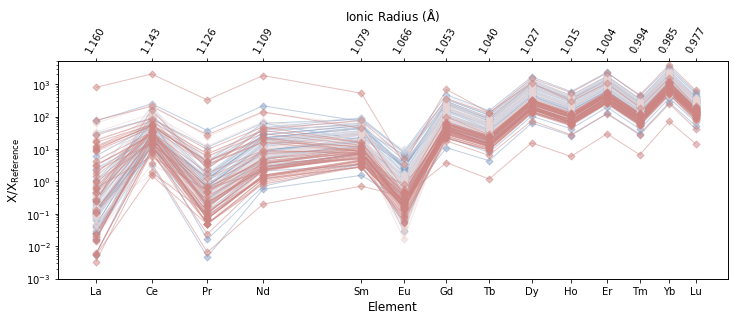

In [23]:
fig, ax = plt.subplots(1, 1, sharey=True, sharex=True, figsize=(12, 4))

te_data_BM22 = te_data[te_data['Sample'] == 'BM22-1']
te_data_IR22 = te_data[te_data['Sample'] == 'IR22-1']
te_data_OR24 = te_data[te_data['Sample'] == 'OR24-2']
te_data_MT24 = te_data[te_data['Sample'] == 'MT24-1']

te_data_BM22.pyroplot.REE(ax=ax,color=color_1,alpha=0.5)
te_data_IR22.pyroplot.REE(ax=ax,color=color_2,alpha=0.5)
te_data_OR24.pyroplot.REE(ax=ax,color=color_3,alpha=0.5)
te_data_MT24.pyroplot.REE(ax=ax,color=color_4,alpha=0.5)
ax.set_ylim(.001, 5000)

/Users/unimos/opt/anaconda3/lib/python3.9/site-packages/pyrolite/plot/spider.py:270: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_ylim(_ymin, _ymax)


<AxesSubplot:xlabel='Element', ylabel='$\\mathrm{X / X_{Reference}}$'>

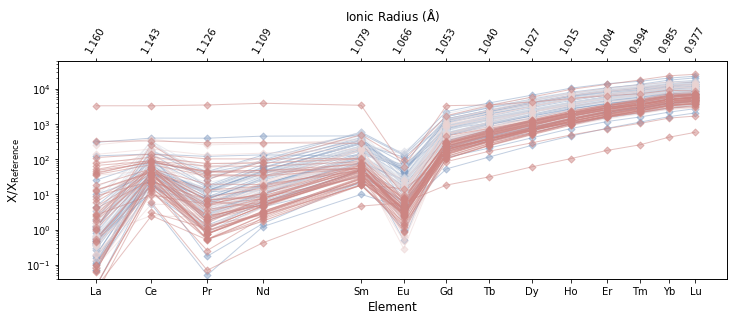

In [24]:
fig, ax = plt.subplots(1, 1, sharey=True, sharex=True, figsize=(12, 4))

te_data_norm_BM22 = te_data_norm[te_data_norm['Sample'] == 'BM22-1']
te_data_norm_IR22 = te_data_norm[te_data_norm['Sample'] == 'IR22-1']
te_data_norm_OR24 = te_data_norm[te_data_norm['Sample'] == 'OR24-2']
te_data_norm_MT24 = te_data_norm[te_data_norm['Sample'] == 'MT24-1']

te_data_norm_BM22.pyroplot.REE(ax=ax,color=color_1,alpha=0.5)
te_data_norm_IR22.pyroplot.REE(ax=ax,color=color_2,alpha=0.5)
te_data_norm_OR24.pyroplot.REE(ax=ax,color=color_3,alpha=0.5)
te_data_norm_MT24.pyroplot.REE(ax=ax,color=color_4,alpha=0.5)
#ax.set_ylim(.001, 5000)

/Users/unimos/opt/anaconda3/lib/python3.9/site-packages/pyrolite/plot/spider.py:270: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_ylim(_ymin, _ymax)


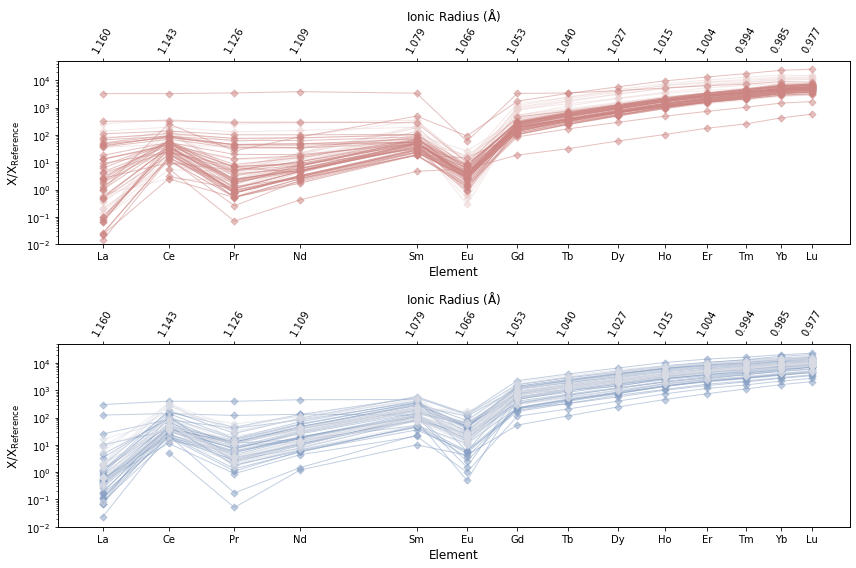

In [25]:
fig, ax = plt.subplots(2, 1, figsize=(12, 8))

te_data_norm_OR24.pyroplot.REE(ax=ax[0],color=color_3,alpha=0.5)
te_data_norm_MT24.pyroplot.REE(ax=ax[0],color=color_4,alpha=0.5)
ax[0].set_ylim(.01, 50000)

te_data_norm_BM22.pyroplot.REE(ax=ax[1],color=color_1,alpha=0.5)
te_data_norm_IR22.pyroplot.REE(ax=ax[1],color=color_2,alpha=0.5)
ax[1].set_ylim(.01, 50000)

plt.tight_layout()
plt.show()

/Users/unimos/opt/anaconda3/lib/python3.9/site-packages/pyrolite/plot/spider.py:270: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_ylim(_ymin, _ymax)


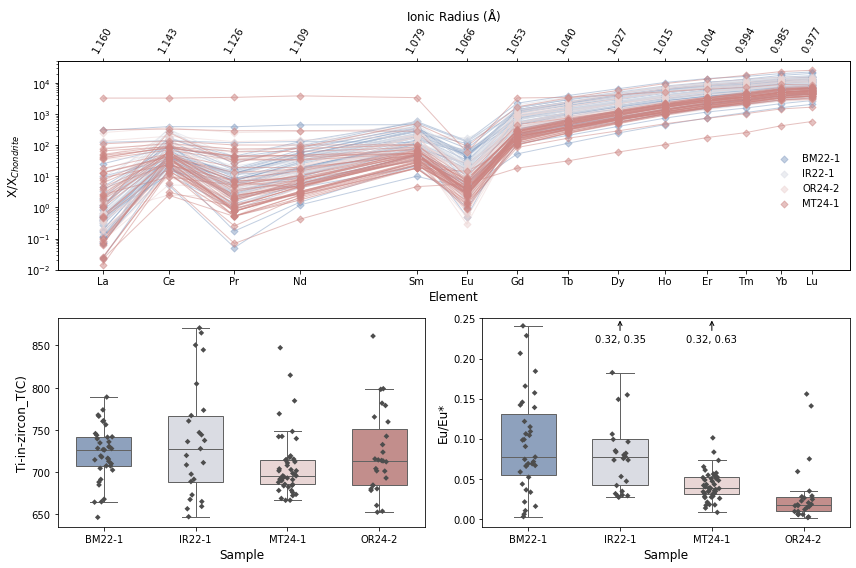

In [26]:
fig = plt.figure(figsize=(12, 8))

gs = fig.add_gridspec(2,2)
ax1 = fig.add_subplot(gs[0, :])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1])

te_data_norm_BM22.pyroplot.REE(ax=ax1,color=color_1,alpha=0.5,label='BM22-1')
te_data_norm_IR22.pyroplot.REE(ax=ax1,color=color_2,alpha=0.5,label='IR22-1')
te_data_norm_OR24.pyroplot.REE(ax=ax1,color=color_3,alpha=0.5,label='OR24-2')
te_data_norm_MT24.pyroplot.REE(ax=ax1,color=color_4,alpha=0.5,label='MT24-1')
ax1.set_ylabel("X/X$_{Chondrite}$")
ax1.legend(loc='best', bbox_to_anchor=(0.5, 0.1, 0.5, 0.5))
ax1.set_ylim(.01, 50000)


sns.boxplot(x='Sample',y='Ti-in-zircon_T(C)',data=te_data,
            width=.6, palette="vlag",showfliers = False,ax=ax2)
sns.stripplot(x='Sample',y='Ti-in-zircon_T(C)',data=te_data,
              size=4, color=".3", linewidth=0,ax=ax2)

sns.boxplot(x='Sample', y='Eu/Eu*', data=te_data, width=.6, palette="vlag", showfliers=False,ax=ax3)
sns.stripplot(x='Sample', y='Eu/Eu*', data=te_data, size=4, color=".3", linewidth=0,ax=ax3)
ax3.set_ylim(-.01, 0.25)

sample_index = 1
ax3.annotate(
        '0.32, 0.35',
        xy=(sample_index, upper_limit),
        xytext=(sample_index, upper_limit-0.03),
        arrowprops=dict(facecolor='black', arrowstyle='->'),
        horizontalalignment='center')

sample_index = 2
ax3.annotate(
        '0.32, 0.63',
        xy=(sample_index, upper_limit),
        xytext=(sample_index, upper_limit-0.03),
        arrowprops=dict(facecolor='black', arrowstyle='->'),
        horizontalalignment='center')

plt.tight_layout()
plt.savefig('Spider_plot_Titanium_temp_Europium_anomaly_plots.png')
plt.show()

/Users/unimos/opt/anaconda3/lib/python3.9/site-packages/pyrolite/plot/spider.py:270: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_ylim(_ymin, _ymax)


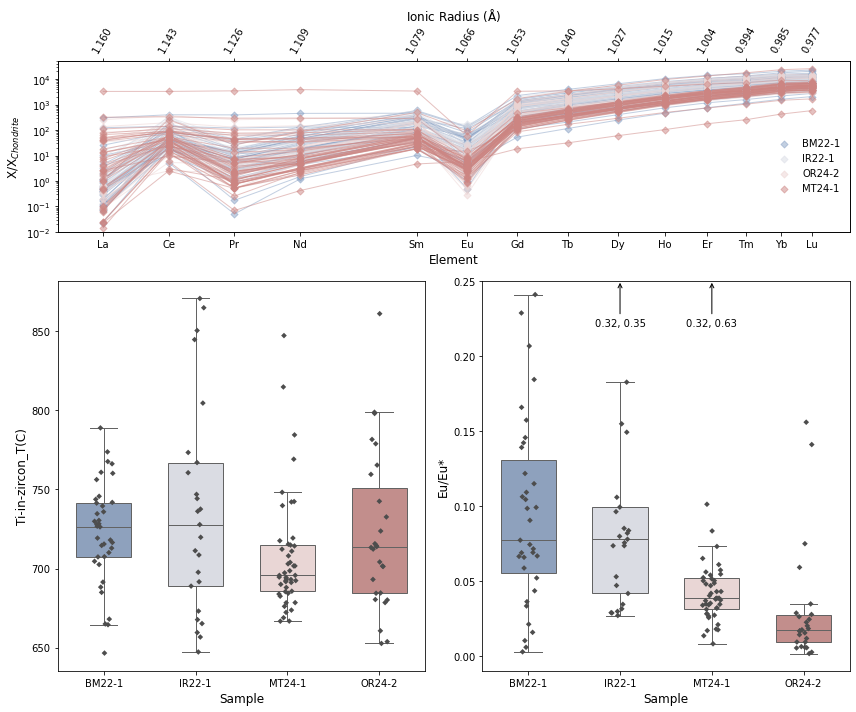

In [27]:
fig = plt.figure(figsize=(12, 10))

gs = fig.add_gridspec(3,2)
ax1 = fig.add_subplot(gs[0, :])
ax2 = fig.add_subplot(gs[1:3, 0])
ax3 = fig.add_subplot(gs[1:3, 1])

te_data_norm_BM22.pyroplot.REE(ax=ax1,color=color_1,alpha=0.5,label='BM22-1')
te_data_norm_IR22.pyroplot.REE(ax=ax1,color=color_2,alpha=0.5,label='IR22-1')
te_data_norm_OR24.pyroplot.REE(ax=ax1,color=color_3,alpha=0.5,label='OR24-2')
te_data_norm_MT24.pyroplot.REE(ax=ax1,color=color_4,alpha=0.5,label='MT24-1')
ax1.set_ylabel("X/X$_{Chondrite}$")
ax1.legend(loc='best', bbox_to_anchor=(0.5, 0.1, 0.5, 0.5))
ax1.set_ylim(.01, 50000)


sns.boxplot(x='Sample',y='Ti-in-zircon_T(C)',data=te_data,
            width=.6, palette="vlag",showfliers = False,ax=ax2)
sns.stripplot(x='Sample',y='Ti-in-zircon_T(C)',data=te_data,
              size=4, color=".3", linewidth=0,ax=ax2)

sns.boxplot(x='Sample', y='Eu/Eu*', data=te_data, width=.6, palette="vlag", showfliers=False,ax=ax3)
sns.stripplot(x='Sample', y='Eu/Eu*', data=te_data, size=4, color=".3", linewidth=0,ax=ax3)
ax3.set_ylim(-.01, 0.25)

sample_index = 1
ax3.annotate(
        '0.32, 0.35',
        xy=(sample_index, upper_limit),
        xytext=(sample_index, upper_limit-0.03),
        arrowprops=dict(facecolor='black', arrowstyle='->'),
        horizontalalignment='center')

sample_index = 2
ax3.annotate(
        '0.32, 0.63',
        xy=(sample_index, upper_limit),
        xytext=(sample_index, upper_limit-0.03),
        arrowprops=dict(facecolor='black', arrowstyle='->'),
        horizontalalignment='center')

plt.tight_layout()
plt.savefig('Spider_plot_Titanium_temp_Europium_anomaly_plotsV2.png')
plt.show()

# Ti Temp in core vs. overgrowth samples

In [28]:
te_data_IR22_BM22 = te_data[(te_data['Sample'] == 'IR22-1') | (te_data['Sample'] == 'BM22-1')]

In [29]:
te_data_IR22_BM22.head()

,Sample,Analysis,U_ppm,Th_ppm,Pb_ppm,Th/U,P,Ti,Y,Zr,Nb,La,Ce,Pr,Nd,Sm,Eu,Gd,Tb,Dy,Ho,Er,Tm,Yb,Lu,Hf,Ta,Th,U,Ti-in-zircon_T(C),Ce/Ce*,Eu/Eu*,Epsilon_REE,(Gd/Yb)cn,Lu/Hf,Nb/Ta,Nb/U,Nb/Th,Th/U.1,Th/Y,Hf/Y,Nb/Yb,U/Yb,location
0,BM22-1,BM22-1 L 43,969.806175,695.151658,2.077639,0.716794,587.196534,8.010092,8782.085829,NaN,8.179087,0.099263,23.834022,1.120590,21.488085,47.955470,2.648856,248.544790,82.808974,894.303485,320.754140,1303.592615,246.652434,2042.714032,344.172669,4707.968935,2.270528,695.151658,969.806175,773.774743,17.521244,0.074176,5580.689427,0.100655,0.073104,3.602284,0.008434,0.011766,0.716794,0.079156,0.536088,0.004004,0.474764,overgrowth
1,BM22-1,BM22-1 L 44,1160.946797,1077.167990,2.548710,0.927836,591.678352,5.387764,10464.993479,NaN,12.202947,0.295949,63.950646,1.495157,27.985411,52.901869,4.638531,288.814808,93.841179,1063.151283,370.731452,1520.816397,290.155425,2342.138742,395.509789,4404.090997,3.218647,1077.167990,1160.946797,735.881792,23.570970,0.114725,6516.426640,0.102010,0.089805,3.791328,0.010511,0.011329,0.927836,0.102931,0.420840,0.005210,0.495678,core
2,BM22-1,BM22-1 L 45,1604.728830,1043.047102,3.457918,0.649983,610.996708,7.419431,9617.927494,NaN,7.965093,0.116488,24.385773,1.184865,20.745030,44.464981,2.319335,255.264745,83.692034,970.218459,358.243202,1414.760201,272.909983,2312.878601,390.039170,4913.463050,2.113718,1043.047102,1604.728830,766.235321,16.093313,0.066555,6151.222869,0.091301,0.079382,3.768285,0.004964,0.007636,0.649983,0.108448,0.510865,0.003444,0.693823,core
3,BM22-1,BM22-1 L 46,442.110422,160.161886,0.883038,0.362267,248.159290,3.794496,1186.905508,NaN,2.692170,0.116030,7.043512,0.083205,2.068656,3.177627,0.059109,23.208354,7.812099,102.665434,41.813167,193.785199,41.028073,366.153434,68.248218,5741.348325,1.374493,160.161886,442.110422,704.597314,17.575779,0.021043,857.262118,0.052435,0.011887,1.958664,0.006089,0.016809,0.362267,0.134941,4.837241,0.007353,1.207446,overgrowth
4,BM22-1,BM22-1 L 48,191.859762,55.483375,0.449401,0.289187,172.896514,3.704804,762.026397,NaN,1.312337,NaN,3.226424,0.004788,0.575184,1.542009,0.247261,10.925175,4.355005,63.024558,25.774977,124.294702,29.321087,271.980665,51.579046,6035.261314,0.852316,55.483375,191.859762,702.533226,660.875760,0.184171,586.850880,0.033230,0.008546,1.539730,0.006840,0.023653,0.289187,0.072810,7.920016,0.004825,0.705417,core


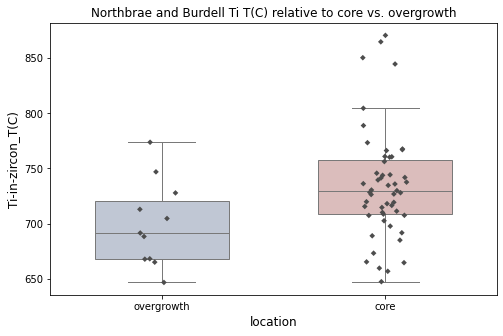

In [30]:
plt.figure(figsize=(8,5))
sns.boxplot(x='location',y='Ti-in-zircon_T(C)',data=te_data_IR22_BM22,
            width=.6, palette="vlag",showfliers = False)
sns.stripplot(x='location',y='Ti-in-zircon_T(C)',data=te_data_IR22_BM22,
              size=4, color=".3", linewidth=0)
plt.title('Northbrae and Burdell Ti T(C) relative to core vs. overgrowth')
plt.show()

In [31]:
te_data_IR22_core_overgrowth = te_data[te_data['Sample'] == 'IR22-1']
te_data_BM22_core_overgrowth = te_data[te_data['Sample'] == 'BM22-1']

In [32]:
te_data_IR22_core_overgrowth.head()

,Sample,Analysis,U_ppm,Th_ppm,Pb_ppm,Th/U,P,Ti,Y,Zr,Nb,La,Ce,Pr,Nd,Sm,Eu,Gd,Tb,Dy,Ho,Er,Tm,Yb,Lu,Hf,Ta,Th,U,Ti-in-zircon_T(C),Ce/Ce*,Eu/Eu*,Epsilon_REE,(Gd/Yb)cn,Lu/Hf,Nb/Ta,Nb/U,Nb/Th,Th/U.1,Th/Y,Hf/Y,Nb/Yb,U/Yb,location
39,IR22-1,IR22-1 L 70,1116.343606,486.930153,2.319865,0.436183,517.208563,2.360971,5017.504154,NaN,12.052489,0.019567,24.845359,0.299213,5.773529,16.099310,1.347670,107.350427,40.339213,498.453685,191.194112,766.899646,157.906897,1244.343596,224.496250,5178.295949,3.197132,486.930153,1116.343606,665.221882,79.611309,0.099106,3279.368472,0.071368,0.043353,3.769782,0.010796,0.024752,0.436183,0.097046,1.032046,0.009686,0.897135,core
40,IR22-1,IR22-1 L 71,1527.739851,712.772083,3.301751,0.466553,472.206449,7.000737,7524.236447,NaN,16.746650,3.872098,48.084357,2.020035,20.949002,30.353429,1.287854,183.724804,65.000209,784.729673,294.408470,1165.949851,219.666425,1766.261128,293.373727,5155.848191,3.807018,712.772083,1527.739851,760.590061,4.215370,0.052723,4879.681060,0.086050,0.056901,4.398890,0.010962,0.023495,0.466553,0.094730,0.685232,0.009481,0.864957,core
41,IR22-1,IR22-1 L 72,925.096574,385.669761,1.943237,0.416897,234.442636,4.931844,4610.946847,NaN,12.071193,0.295237,33.906242,0.249902,4.677335,13.656907,0.901655,103.422814,37.602377,457.182544,167.160030,672.072171,131.597635,1034.966610,186.465962,5082.051288,3.519844,385.669761,925.096574,727.804411,30.605080,0.073347,2844.157423,0.082666,0.036691,3.429469,0.013049,0.031299,0.416897,0.083642,1.102171,0.011663,0.893842,overgrowth
42,IR22-1,IR22-1 L 75,1010.030667,451.614528,2.115033,0.447130,310.089827,3.259631,6008.595694,NaN,9.091746,0.157100,24.328841,0.343705,7.462256,20.150307,1.625731,132.847082,48.019184,580.912697,217.117569,901.514191,175.175638,1426.073584,243.548653,5177.115637,3.051160,451.614528,1010.030667,691.633559,25.669979,0.096063,3779.276537,0.077063,0.047043,2.979767,0.009001,0.020132,0.447130,0.075161,0.861618,0.006375,0.708260,core
43,IR22-1,IR22-1 L 76,1587.722914,635.086067,3.316639,0.399998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,core


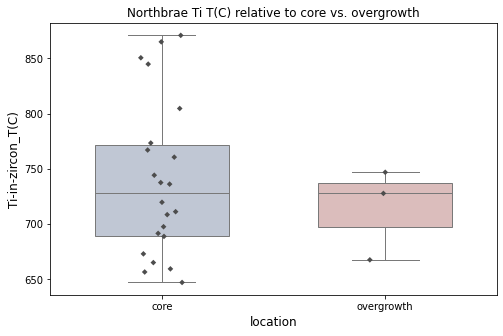

In [33]:
plt.figure(figsize=(8,5))
sns.boxplot(x='location',y='Ti-in-zircon_T(C)',data=te_data_IR22_core_overgrowth,
            width=.6, palette="vlag",showfliers = False)
sns.stripplot(x='location',y='Ti-in-zircon_T(C)',data=te_data_IR22_core_overgrowth,
              size=4, color=".3", linewidth=0)
plt.title('Northbrae Ti T(C) relative to core vs. overgrowth')
plt.show()

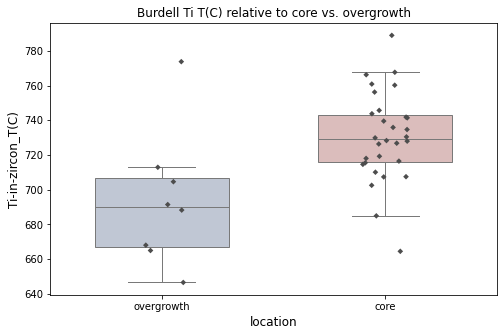

In [34]:
plt.figure(figsize=(8,5))
sns.boxplot(x='location',y='Ti-in-zircon_T(C)',data=te_data_BM22_core_overgrowth,
            width=.6, palette="vlag",showfliers = False)
sns.stripplot(x='location',y='Ti-in-zircon_T(C)',data=te_data_BM22_core_overgrowth,
              size=4, color=".3", linewidth=0)
plt.title('Burdell Ti T(C) relative to core vs. overgrowth')
plt.show()

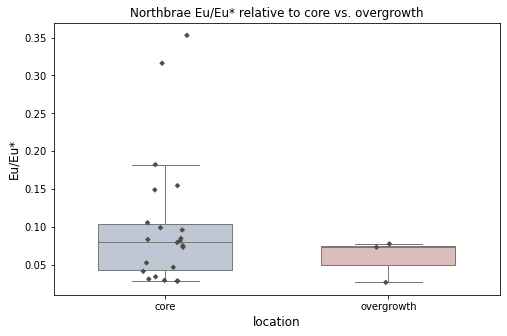

In [35]:
plt.figure(figsize=(8,5))
sns.boxplot(x='location',y='Eu/Eu*',data=te_data_IR22_core_overgrowth,
            width=.6, palette="vlag",showfliers = False)
sns.stripplot(x='location',y='Eu/Eu*',data=te_data_IR22_core_overgrowth,
              size=4, color=".3", linewidth=0)
plt.title('Northbrae Eu/Eu* relative to core vs. overgrowth')
plt.show()

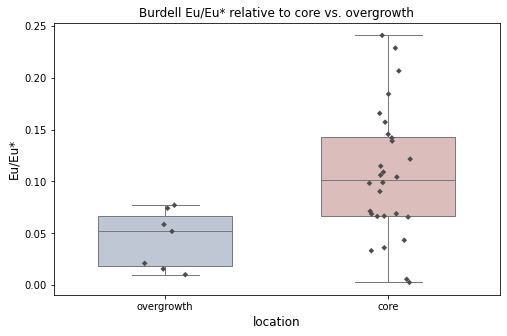

In [36]:
plt.figure(figsize=(8,5))
sns.boxplot(x='location',y='Eu/Eu*',data=te_data_BM22_core_overgrowth,
            width=.6, palette="vlag",showfliers = False)
sns.stripplot(x='location',y='Eu/Eu*',data=te_data_BM22_core_overgrowth,
              size=4, color=".3", linewidth=0)
plt.title('Burdell Eu/Eu* relative to core vs. overgrowth')
plt.show()

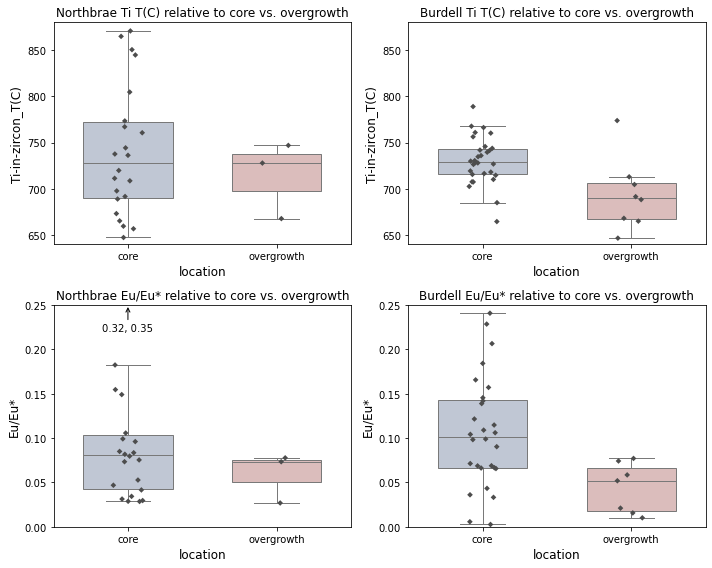

In [57]:
te_data_IR22_core_overgrowth = te_data_IR22_core_overgrowth.sort_values(by="location")
te_data_BM22_core_overgrowth = te_data_BM22_core_overgrowth.sort_values(by="location")

plt.figure(figsize=(10,8))

ax1 = plt.subplot(2,2,1)
sns.boxplot(x='location',y='Ti-in-zircon_T(C)',data=te_data_IR22_core_overgrowth,
            width=.6, palette="vlag",showfliers = False)
sns.stripplot(x='location',y='Ti-in-zircon_T(C)',data=te_data_IR22_core_overgrowth,
              size=4, color=".3", linewidth=0)
plt.title('Northbrae Ti T(C) relative to core vs. overgrowth')
ax1.set_ylim(640, 880)

ax2 = plt.subplot(2,2,2)
sns.boxplot(x='location',y='Ti-in-zircon_T(C)',data=te_data_BM22_core_overgrowth,
            width=.6, palette="vlag",showfliers = False)
sns.stripplot(x='location',y='Ti-in-zircon_T(C)',data=te_data_BM22_core_overgrowth,
              size=4, color=".3", linewidth=0)
plt.title('Burdell Ti T(C) relative to core vs. overgrowth')
ax2.set_ylim(640, 880)

ax3 = plt.subplot(2,2,3)
sns.boxplot(x='location',y='Eu/Eu*',data=te_data_IR22_core_overgrowth,
            width=.6, palette="vlag",showfliers = False)
sns.stripplot(x='location',y='Eu/Eu*',data=te_data_IR22_core_overgrowth,
              size=4, color=".3", linewidth=0)
plt.title('Northbrae Eu/Eu* relative to core vs. overgrowth')
ax3.set_ylim(0, 0.25)

sample_index = 0
ax3.annotate(
        '0.32, 0.35',
        xy=(sample_index, upper_limit),
        xytext=(sample_index, upper_limit-0.03),
        arrowprops=dict(facecolor='black', arrowstyle='->'),
        horizontalalignment='center')


ax4 = plt.subplot(2,2,4)
sns.boxplot(x='location',y='Eu/Eu*',data=te_data_BM22_core_overgrowth,
            width=.6, palette="vlag",showfliers = False)
sns.stripplot(x='location',y='Eu/Eu*',data=te_data_BM22_core_overgrowth,
              size=4, color=".3", linewidth=0)
plt.title('Burdell Eu/Eu* relative to core vs. overgrowth')
ax4.set_ylim(0, 0.25)
plt.tight_layout()

plt.savefig('./output/core_v_rim_geochem.pdf')
plt.show()
